In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import csv file
df = pd.read_csv('eatsure_sales_data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(200, 8)

In [4]:
df.head()

,Order ID,Order Date,City,Brand,Category,Order Value,Payment mode,Delivery time mins
0,1001,01-01-2025,Hyderabad,Faasos,Pizza,1106,Debit Card,45
1,1002,02-01-2025,Pune,Faasos,Wraps,840,UPI,53
2,1003,03-01-2025,Bengaluru,Faasos,Pizza,434,UPI,64
3,1004,04-01-2025,Pune,Behrouz Biryani,Pizza,546,Credit Card,25
4,1005,05-01-2025,Pune,Behrouz Biryani,Wraps,161,Credit Card,56


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Order ID            200 non-null    int64
 1   Order Date          200 non-null    str  
 2   City                200 non-null    str  
 3   Brand               200 non-null    str  
 4   Category            200 non-null    str  
 5   Order Value         200 non-null    int64
 6   Payment mode        200 non-null    str  
 7   Delivery time mins  200 non-null    int64
dtypes: int64(3), str(5)
memory usage: 12.6 KB


In [6]:
df.describe()

,Order ID,Order Value,Delivery time mins
count,200.000000,200.000000,200.000000
mean,1100.500000,717.550000,41.415000
std,57.879185,311.045534,13.375624
min,1001.000000,150.000000,20.000000
25%,1050.750000,474.500000,29.000000
50%,1100.500000,803.500000,43.000000
75%,1150.250000,973.500000,53.250000
max,1200.000000,1198.000000,64.000000


In [7]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

# EXPLORATORY DATA ANALYSIS

In [8]:
# Which city generates the highest revenue?
city_revenue = df.groupby("City")["Order Value"].sum().sort_values(ascending=False)
city_revenue

City
Hyderabad    37645
Mumbai       30993
Bengaluru    26127
Delhi        24868
Pune         23877
Name: Order Value, dtype: int64

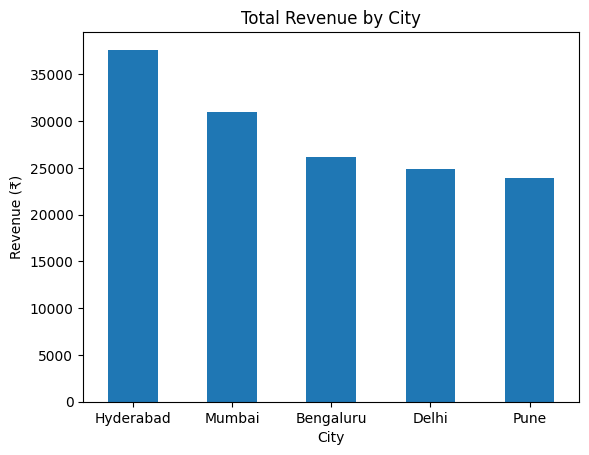

In [9]:
city_revenue.plot(
    kind="bar",
    title="Total Revenue by City",
    xlabel="City",
    ylabel="Revenue (₹)",
    rot=0
)
plt.show()

In [10]:
city_max = city_revenue.idxmax()
print("The city with the highest revenue=", city_max)

The city with the highest revenue= Hyderabad


In [11]:
# Which brand performs best?
brand_revenue = df.groupby("Brand")["Order Value"].sum().sort_values(ascending=False)
brand_revenue

Brand
Oven Story         42754
EatSure            36313
Behrouz Biryani    33204
Faasos             31239
Name: Order Value, dtype: int64

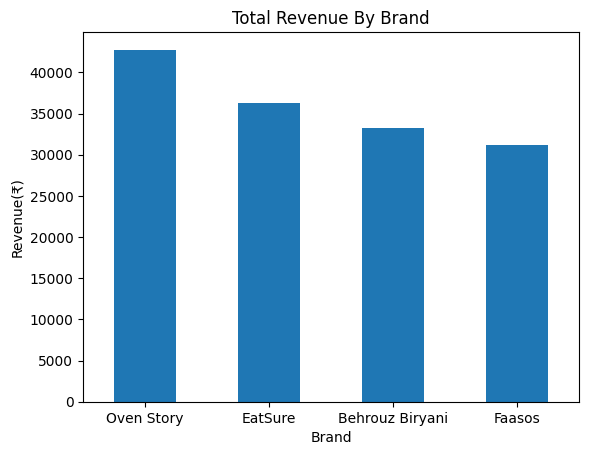

In [12]:
brand_revenue.plot(
    kind= 'bar',
    title= 'Total Revenue By Brand',
    xlabel='Brand',
    ylabel='Revenue(₹)',
    rot=0
)
plt.show()

In [13]:
# What is the average order value?
brand_avg= df.groupby("Brand")["Order Value"].mean()
brand_avg

Brand
Behrouz Biryani    737.866667
EatSure            772.617021
Faasos             743.785714
Oven Story         647.787879
Name: Order Value, dtype: float64

In [14]:
brand_avg.plot(
    kind= 'bar', color= 'hotpink',
    title= 'Average Order Value',
    xlabel= 'Brand',
    ylabel= 'Order Value',
    rot= 0
)
plt.show()

NameError: name 'brand_avg' is not defined

In [18]:
# Which payment mode is most used?
most_pay= df["Payment mode"].value_counts()
most_pay

Payment mode
Credit Card    56
Debit Card     54
UPI            48
Cash           42
Name: count, dtype: int64

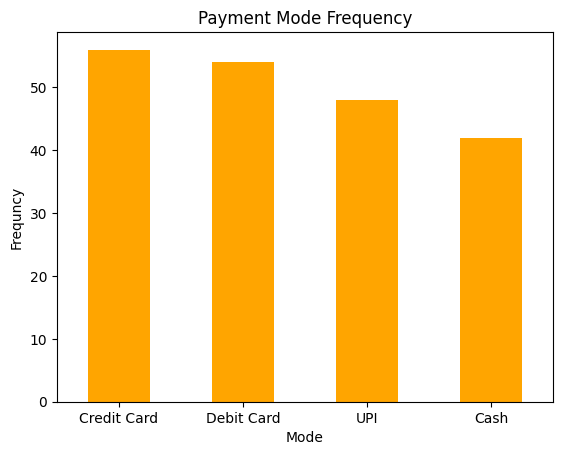

In [21]:
most_pay.plot(
    kind= 'bar', color= 'orange',
    title= 'Payment Mode Frequency',
    xlabel= 'Mode',
    ylabel= 'Frequncy',
    rot= 0
)
plt.show()

In [24]:
# Are delivery times consistent across cities?
del_time= df.groupby("City")["Delivery time mins"].mean()
del_time

City
Bengaluru    39.648649
Delhi        40.657143
Hyderabad    40.632653
Mumbai       44.534884
Pune         41.305556
Name: Delivery time mins, dtype: float64

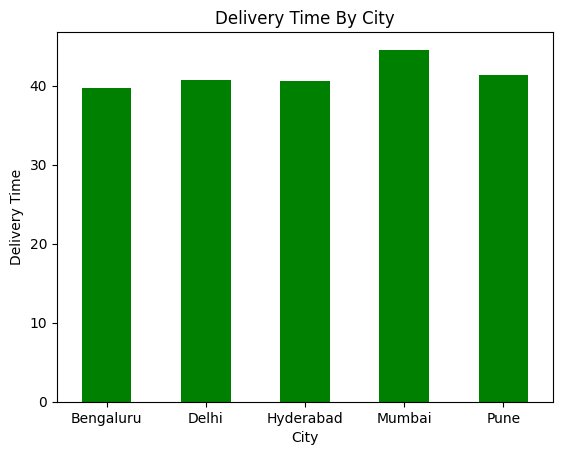

In [26]:
del_time.plot(
    kind= 'bar', color= 'green',
    title= 'Delivery Time By City',
    xlabel= 'City',
    ylabel= 'Delivery Time',
    rot=0
)
plt.show()

## Conclusion & Key Insights

- The analysis shows that Hyderabad generates the highest revenue, indicating strong customer demand and order volume in this city.

- Among the brands, higher average order values suggest that certain brands attract customers willing to spend more per order.

- The overall average order value provides a clear understanding of typical customer spending behavior.

- UPI is the most commonly used payment mode, highlighting customer preference for fast and digital payment methods.

- Delivery time analysis across cities shows that delivery performance is largely consistent, with only minor variations, indicating an efficient delivery process.

*This project demonstrates how Pandas and data visualization can be used to extract meaningful business insights from raw sales data and support data-driven decision-making.*

*Thank you*